In [1]:
from functions import *
import anndata as ad
import os

In [2]:
pth0 = '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count'
pths = [os.path.join(pth0, "".join([f,'/outs/binned_outputs/square_016um'])) for f in os.listdir(pth0)]
pths

['/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/AJER376R/outs/binned_outputs/square_016um',
 '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/AJGB283/outs/binned_outputs/square_016um',
 '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/AJLC170/outs/binned_outputs/square_016um',
 '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/ALAH020_FT/outs/binned_outputs/square_016um']

In [11]:
i = 0

pth = pths[i]

In [12]:
min_genes = 10
min_cells = 5

parquet_to_csv(pth)
adata = sc.read_visium(pth)
adata = fix_xy(adata)
raw_matrix_df = make_raw_matrix(pth, adata)

# uncomment first for no QC, it still normalizes though. Use to tune min_genes and min_cells
adata = qc_spots_and_norm(adata, 0, 0, False, False)
#adata = qc_spots_and_norm(adata, min_genes, min_cells, True, True)

/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/scanpy/readwrite.py:482: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(
/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/anndata/_core/anndata.p

In [13]:
adata

AnnData object with n_obs × n_vars = 157222 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

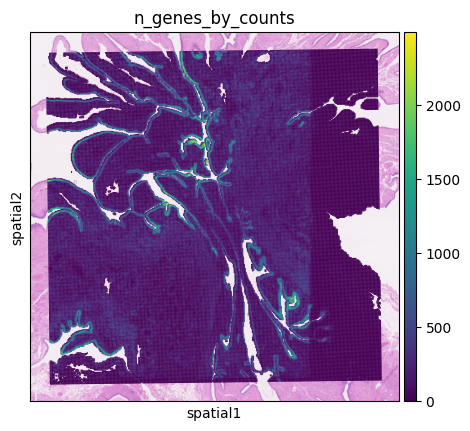

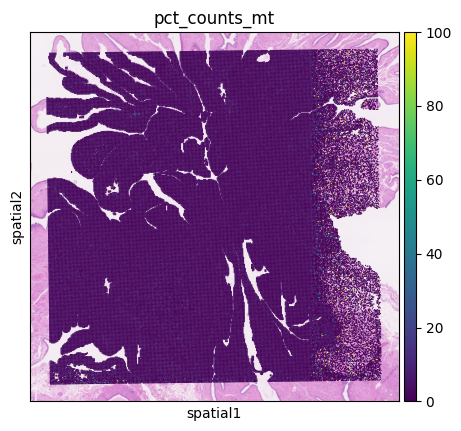

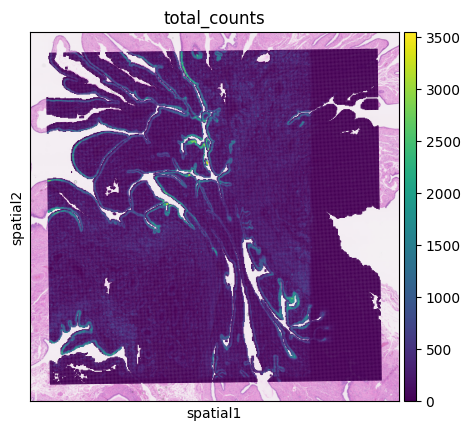

In [14]:
sc.pl.spatial(adata, img_key="hires", color="n_genes_by_counts", size=1.5)
sc.pl.spatial(adata, img_key="hires", color="pct_counts_mt", size=1.5)
sc.pl.spatial(adata, img_key="hires", color="total_counts", size=1.5)

In [18]:
# Cluster
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(
    adata, key_added="clusters", flavor="igraph", directed=False, n_iterations=2
)

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

KeyboardInterrupt: 

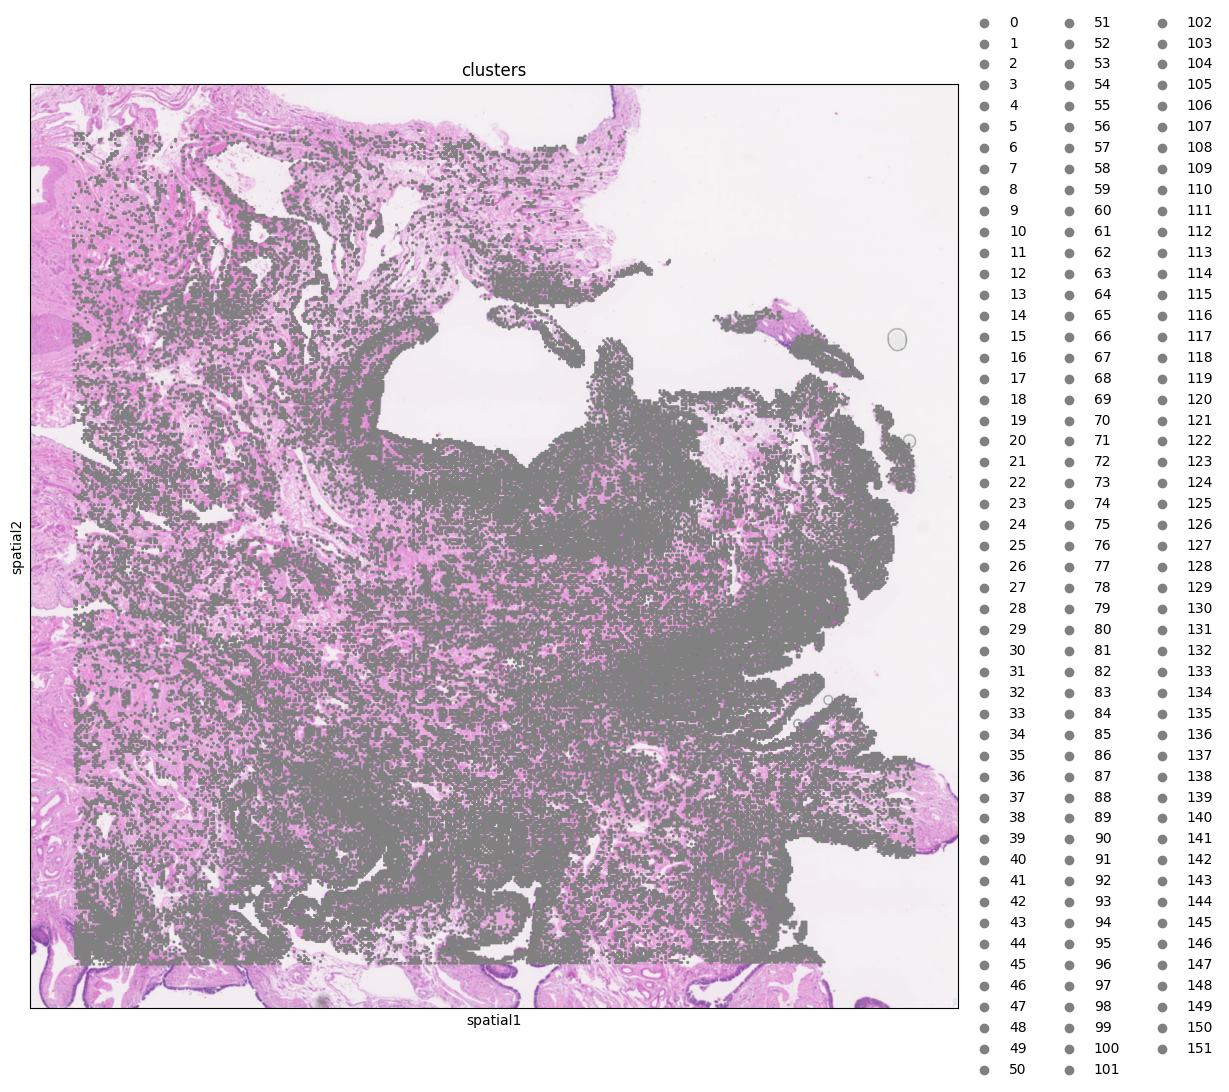

In [14]:
from IPython.display import display

# return a fig object so that I can change size
f = sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5,return_fig=True,show=False)
f.set_size_inches(12, 12)